<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/accuracy_simulation_210121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import random

In [2]:
def NG(k=0.5, s=0.5, n=12,current_aspect = 1):
    T = s**n
    B = (s**n)+(k**n)
    neural_gain = (T/B)*((-1)**current_aspect)
    return neural_gain


In [3]:
stim_sample = ['global','local']
aspect = [1, 0] #0 is for global, 1 is for local

In [4]:
#RT function
def RT(k=0.5, global_s=0.55, local_s=0.45, n=12, upper_b=5, p_global=50, intention='global', congruent=True, max_iter=20000):
    #print ('RT in')
    p_local=100-p_global
    lower_b=-upper_b
    NG_sum = 0
    time = 0


    while NG_sum < upper_b and NG_sum > lower_b:
        current_sample = random.choices(stim_sample, weights=(p_global, p_local), k=1)

        #print(current_sample)
        current_aspect = 0 if current_sample == ['global'] else 1
        #print('aspect is', current_aspect)
        signal = global_s if current_sample == ['global'] else local_s
        #print('signal is', signal)
        gain = 0
        if congruent:
            if intention == 'global':
                gain = NG(k, signal, n, 0)
                NG_sum = NG_sum + gain
                time = time + 1
            else:
                gain = NG(k, signal, n, 1)
                NG_sum = NG_sum + gain
                time = time + 1
        else:
            gain = NG(k, signal, n, current_aspect)
            NG_sum = NG_sum + gain
            time = time + 1
        #print(time)
        #print(NG_sum)
        if time > max_iter:
            break

    if NG_sum >= upper_b:
        ans = 'global'
    if NG_sum <= lower_b:
        ans = 'local'
    #print ('RT out')
    return intention, ans, time


In [11]:
def df_accuracy(N=100, global_s=0.55, local_s=0.45, n=12, p_global=50):
    base_array = np.zeros(N)
    accuracy_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global)
    RT_array = np.array([accuracy_by_con(xi) for xi in base_array])
    df = pd.DataFrame(data=RT_array, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = base_array
    total = df['right'].sum()
    return total/N


In [12]:
def plot_acc_by_prob(N=100, min=0, max=61, step = 1, global_s=0.55, local_s=0.45, n=12):
    prob_range = np.array(range(min,max,step))
    acc_by_prob = lambda y: df_accuracy(N=N, p_global=y, global_s=global_s, local_s=local_s, n=n)
    ar2 = np.array([acc_by_prob(yi) for yi in prob_range])
    plt.scatter(prob_range, ar2)
    plt.title('Accuracy by Probability')
    plt.xlabel('probability')
    plt.ylabel('accuracy')
    return plt.show()

In [13]:
_=interact(plot_acc_by_prob, n=(1.,15,1.), global_s =(0,1.,0.02), local_s=(0,1.,0.02))
print(_)


interactive(children=(IntSlider(value=100, description='N', max=300, min=-100), IntSlider(value=0, description…

<function plot_acc_by_prob at 0x7fb435340cb0>


In [26]:
def df_average(N=100, global_s=0.55, local_s=0.45, n=12, p_global=48, intention = 'global'):
    incon_array = np.zeros(N)
    rt_by_con = lambda x: RT(congruent = x, global_s=global_s, local_s=local_s, n=n, p_global=p_global, intention = intention)
    ar = np.array([rt_by_con(xi) for xi in incon_array])
    df = pd.DataFrame(data=ar, columns=['intention', 'answer', 'time'])
    df['right'] = np.where(df['intention'] == df['answer'], 1, 0)
    df['con'] = incon_array
    print('whole dataframe', '\n' , df)
    df1 = df.loc[lambda df: df['right'] == 1]
    df1['time'] = pd.to_numeric(df1['time'])
    accuracy = df1.shape[0]/N
    print(accuracy)
    print('new dataframe', '\n', df1)
    print(df1.describe())
    average_rtime = df1['time'].mean()

    return accuracy, average_rtime

print('av time is',df_average(n=6))

whole dataframe 
    intention  answer time  right  con
0     global  global   48      1  0.0
1     global  global   27      1  0.0
2     global  global   42      1  0.0
3     global  global   35      1  0.0
4     global  global   42      1  0.0
..       ...     ...  ...    ...  ...
95    global  global   27      1  0.0
96    global  global   45      1  0.0
97    global  global   76      1  0.0
98    global  global   39      1  0.0
99    global  global   19      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention  answer  time  right  con
0     global  global    48      1  0.0
1     global  global    27      1  0.0
2     global  global    42      1  0.0
3     global  global    35      1  0.0
4     global  global    42      1  0.0
..       ...     ...   ...    ...  ...
95    global  global    27      1  0.0
96    global  global    45      1  0.0
97    global  global    76      1  0.0
98    global  global    39      1  0.0
99    global  global    19      1  0.0

[100 rows x 5

whole dataframe 
    intention answer time  right  con
0      local  local   18      1  0.0
1      local  local   16      1  0.0
2      local  local   25      1  0.0
3      local  local   14      1  0.0
4      local  local   36      1  0.0
..       ...    ...  ...    ...  ...
95     local  local   27      1  0.0
96     local  local   29      1  0.0
97     local  local   18      1  0.0
98     local  local   18      1  0.0
99     local  local   14      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention answer  time  right  con
0      local  local    18      1  0.0
1      local  local    16      1  0.0
2      local  local    25      1  0.0
3      local  local    14      1  0.0
4      local  local    36      1  0.0
..       ...    ...   ...    ...  ...
95     local  local    27      1  0.0
96     local  local    29      1  0.0
97     local  local    18      1  0.0
98     local  local    18      1  0.0
99     local  local    14      1  0.0

[100 rows x 5 columns]
             t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention answer time  right  con
0      local  local  112      1  0.0
1      local  local   83      1  0.0
2      local  local   99      1  0.0
3      local  local   42      1  0.0
4      local  local   30      1  0.0
..       ...    ...  ...    ...  ...
95     local  local   50      1  0.0
96     local  local   71      1  0.0
97     local  local   42      1  0.0
98     local  local   50      1  0.0
99     local  local   91      1  0.0

[100 rows x 5 columns]
0.98
new dataframe 
    intention answer  time  right  con
0      local  local   112      1  0.0
1      local  local    83      1  0.0
2      local  local    99      1  0.0
3      local  local    42      1  0.0
4      local  local    30      1  0.0
..       ...    ...   ...    ...  ...
95     local  local    50      1  0.0
96     local  local    71      1  0.0
97     local  local    42      1  0.0
98     local  local    50      1  0.0
99     local  local    91      1  0.0

[98 rows x 5 columns]
             t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   92.000000   92.0  92.0
mean    94.021739    1.0   0.0
std     62.473023    0.0   0.0
min     23.000000    1.0   0.0
25%     48.750000    1.0   0.0
50%     70.000000    1.0   0.0
75%    130.000000    1.0   0.0
max    352.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0      local  global  100      0  0.0
1      local   local  117      1  0.0
2      local   local   88      1  0.0
3      local   local  266      1  0.0
4      local   local  122      1  0.0
..       ...     ...  ...    ...  ...
95     local   local   88      1  0.0
96     local   local  112      1  0.0
97     local   local   73      1  0.0
98     local   local   88      1  0.0
99     local   local  127      1  0.0

[100 rows x 5 columns]
0.86
new dataframe 
    intention answer  time  right  con
1      local  local   117      1  0.0
2      local  local    88      1  0.0
3      local  local   266      1  0.0
4      local  local   122      1  0.0
5      local

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


             time  right   con
count   86.000000   86.0  86.0
mean   125.023256    1.0   0.0
std     73.592355    0.0   0.0
min     35.000000    1.0   0.0
25%     69.000000    1.0   0.0
50%    112.000000    1.0   0.0
75%    168.750000    1.0   0.0
max    397.000000    1.0   0.0
whole dataframe 
    intention  answer time  right  con
0      local  global  272      0  0.0
1      local   local   90      1  0.0
2      local   local  111      1  0.0
3      local  global   88      0  0.0
4      local   local   64      1  0.0
..       ...     ...  ...    ...  ...
95     local   local  101      1  0.0
96     local   local  248      1  0.0
97     local   local  132      1  0.0
98     local   local  111      1  0.0
99     local   local   64      1  0.0

[100 rows x 5 columns]
0.7
new dataframe 
    intention answer  time  right  con
1      local  local    90      1  0.0
2      local  local   111      1  0.0
4      local  local    64      1  0.0
5      local  local    48      1  0.0
6      local 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


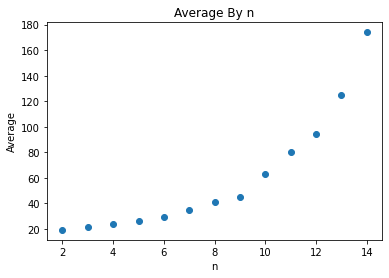

In [31]:
def plot_average_by_n(N=100, min=2, max=15, step = 1, global_s=0.55, local_s=0.45, p_global =50, intention = 'global'):
    n_range = np.array(range(min,max,step))
    av_by_n = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=local_s, n=y, intention=intention)
    ar_av = np.array([av_by_n(yi) for yi in n_range])
    print(ar_av)
    average_for_plot = ar_av[:,1]
    print("average for plot:", '\n', average_for_plot)
    plt.scatter(n_range, average_for_plot)
    plt.title('Average By n')
    plt.xlabel('n')
    plt.ylabel('Average')
    return plt.show() 

print(plot_average_by_n(p_global=18, intention = 'local'))    

whole dataframe 
    intention  answer time  right  con
0      local  global  107      0  0.0
1      local  global  115      0  0.0
2      local  global   72      0  0.0
3      local  global  184      0  0.0
4      local  global  107      0  0.0
..       ...     ...  ...    ...  ...
95     local  global  146      0  0.0
96     local  global  102      0  0.0
97     local  global  101      0  0.0
98     local  global   84      0  0.0
99     local  global  109      0  0.0

[100 rows x 5 columns]
0.0
new dataframe 
 Empty DataFrame
Columns: [intention, answer, time, right, con]
Index: []
       time  right  con
count   0.0    0.0  0.0
mean    NaN    NaN  NaN
std     NaN    NaN  NaN
min     NaN    NaN  NaN
25%     NaN    NaN  NaN
50%     NaN    NaN  NaN
75%     NaN    NaN  NaN
max     NaN    NaN  NaN
whole dataframe 
    intention  answer time  right  con
0      local  global   77      0  0.0
1      local  global   66      0  0.0
2      local  global  126      0  0.0
3      local  global  1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0      local  global   235      0  0.0
1      local   local  1125      1  0.0
2      local  global  1656      0  0.0
3      local  global   803      0  0.0
4      local   local  1318      1  0.0
..       ...     ...   ...    ...  ...
95     local  global   227      0  0.0
96     local  global   200      0  0.0
97     local  global  2220      0  0.0
98     local  global  2002      0  0.0
99     local  global   576      0  0.0

[100 rows x 5 columns]
0.4
new dataframe 
    intention answer  time  right  con
1      local  local  1125      1  0.0
4      local  local  1318      1  0.0
5      local  local   197      1  0.0
6      local  local   983      1  0.0
7      local  local   197      1  0.0
13     local  local   197      1  0.0
14     local  local   377      1  0.0
16     local  local   893      1  0.0
20     local  local  1550      1  0.0
23     local  local   583      1  0.0
26     local  local   983      1  0.0
28     local  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


whole dataframe 
    intention  answer  time  right  con
0      local   local   746      1  0.0
1      local   local   505      1  0.0
2      local   local   166      1  0.0
3      local   local  1227      1  0.0
4      local   local   735      1  0.0
..       ...     ...   ...    ...  ...
95     local   local   986      1  0.0
96     local   local   406      1  0.0
97     local  global   392      0  0.0
98     local   local   275      1  0.0
99     local  global   233      0  0.0

[100 rows x 5 columns]
0.88
new dataframe 
    intention answer  time  right  con
0      local  local   746      1  0.0
1      local  local   505      1  0.0
2      local  local   166      1  0.0
3      local  local  1227      1  0.0
4      local  local   735      1  0.0
..       ...    ...   ...    ...  ...
93     local  local   220      1  0.0
94     local  local   505      1  0.0
95     local  local   986      1  0.0
96     local  local   406      1  0.0
98     local  local   275      1  0.0

[88 rows x 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


              time  right    con
count   100.000000  100.0  100.0
mean    266.350000    1.0    0.0
std     172.351144    0.0    0.0
min      66.000000    1.0    0.0
25%     150.000000    1.0    0.0
50%     197.000000    1.0    0.0
75%     345.000000    1.0    0.0
max    1088.000000    1.0    0.0
whole dataframe 
    intention answer time  right  con
0      local  local   72      1  0.0
1      local  local  121      1  0.0
2      local  local   97      1  0.0
3      local  local  113      1  0.0
4      local  local  429      1  0.0
..       ...    ...  ...    ...  ...
95     local  local  194      1  0.0
96     local  local  170      1  0.0
97     local  local   80      1  0.0
98     local  local   80      1  0.0
99     local  local  153      1  0.0

[100 rows x 5 columns]
1.0
new dataframe 
    intention answer  time  right  con
0      local  local    72      1  0.0
1      local  local   121      1  0.0
2      local  local    97      1  0.0
3      local  local   113      1  0.0
4      

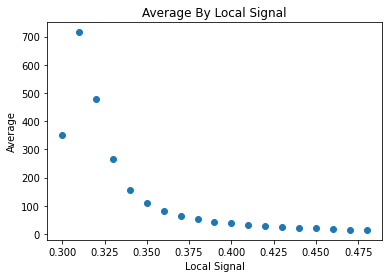

None


In [32]:
#plot average by local signal

def plot_average_by_local_signal(N=100, min=0.2, max=0.49, step = 0.01, n=12, global_s=0.55, p_global =50, intention = 'global'):
    local_sig_range = np.arange(min,max,step)
    #print(local_sig_range)
    av_by_local_signal = lambda y: df_average(N=N, p_global=p_global, global_s=global_s, local_s=y, n=n, intention=intention)
    ar_av_local = np.array([av_by_local_signal(yi) for yi in local_sig_range])
    ar_av_local_for_plot = ar_av_local[:,1]
    plt.scatter(local_sig_range, ar_av_local_for_plot)
    plt.title('Average By Local Signal')
    plt.xlabel('Local Signal')
    plt.ylabel('Average')
    return plt.show()

print(plot_average_by_local_signal(intention = 'local', p_global = 8, n=6)) 

In [ ]:
def optimal_prob_df(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, acc_bound = 0.2, av_bound = 100):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array = np.arange(globalmin,globalmax,0.02)
    print(glob_array)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array)*len(loc_array)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d_for_accuracy = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                av = df_average(N=100, global_s=x, local_s = y, p_global=p)
                if acc > acc_bound:
                    d_for_accuracy.append([x,y,False, acc])
                else:
                    d_for_accuracy.append([x,y,True, acc])
        print(d_for_accuracy)
        prob_work_array = np.array([d_for_accuracy[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return

optimal_prob_df()

In [ ]:
#optimal_prob_by_average
def optimal_prob_by_average(globalmin = 0.53, globalmax=0.7, localmin=0.2, localmax=0.49, average_bound = 200):
    lst_of_prob = []

    cols = ["prob", "global", "local","accuracy"]


    prob_array = np.array(range(2,25,1))
    print(prob_array)
    glob_array_for_av = np.arange(globalmin,globalmax,0.02)
    print(glob_array_for_av)
    loc_array = np.arange(localmin,localmax,0.02)
    samples = len(glob_array_for_av)*len(loc_array_for_av)
    print(samples)
    print(loc_array)
    amount_of_true_lst=[]
    for p in prob_array:
        d = []
        for x in glob_array:
            for y in loc_array:
                acc = df_accuracy(N=100, global_s=x, local_s=y, p_global=p)
                if acc > acc_bound:
                    d.append([x,y,False, acc])
                else:
                    d.append([x,y,True, acc])
        print(d)
        prob_work_array = np.array([d[i][2] for i in range(samples)])
        print('probabililty is',p)
        print(prob_work_array)
        total_true = prob_work_array.sum()
        amount_of_true_lst.append(total_true)
        print('amount of true is', total_true)
    amount_of_true_array = np.array(amount_of_true_lst)
    print(amount_array)
    plt.scatter(prob_array, amount_of_true_array)
    plt.show()
                #d.append([p,x,y,acc])
    #optimal_df = pd.DataFrame(data=d, columns=cols)
    return